In [2]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import requests
import pandas as pd
import time
import scipy.stats as st
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy


### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 581


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
geoapify_key = "24c9ad2bdeb9ddcb5ea213ea1dba4dea"

In [6]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | basco
Processing Record 2 of Set 1 | port-aux-francais
Processing Record 3 of Set 1 | lagawe
Processing Record 4 of Set 1 | jilib
Processing Record 5 of Set 1 | makoua
Processing Record 6 of Set 1 | ola
Processing Record 7 of Set 1 | vila velha
Processing Record 8 of Set 1 | gadzhiyevo
Processing Record 9 of Set 1 | quellon
Processing Record 10 of Set 1 | petropavlovsk-kamchatsky
Processing Record 11 of Set 1 | puerto ayora
Processing Record 12 of Set 1 | tionk essil
Processing Record 13 of Set 1 | nagqu
Processing Record 14 of Set 1 | rawson
Processing Record 15 of Set 1 | punta arenas
Processing Record 16 of Set 1 | ushuaia
Processing Record 17 of Set 1 | chelak
Processing Record 18 of Set 1 | fortaleza
Processing Record 19 of Set 1 | belmonte
Processing Record 20 of Set 1 | college
Processing Record 21 of Set 1 | kiruna
Processing Record 22 of Set 1 | oulainen
Processing Record 23 of Set 1 | i

In [7]:
weather_api_key

'f76e581eab4fefc55854ce9676f62a42'

In [8]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          553
Lat           553
Lng           553
Max Temp      553
Humidity      553
Cloudiness    553
Wind Speed    553
Country       553
Date          553
dtype: int64

In [9]:
# Display sample data
city_data_df.head(4)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,basco,20.4487,121.9702,25.67,77,2,5.40,PH,1709675207
1,port-aux-francais,-49.3500,70.2167,5.67,74,95,15.01,TF,1709675207
2,lagawe,16.8000,121.1192,20.11,95,9,1.22,PH,1709675207
3,jilib,0.4883,42.7854,26.75,83,5,4.37,SO,1709675207


In [10]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [11]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,basco,20.4487,121.9702,25.67,77,2,5.40,PH,1709675207
1,port-aux-francais,-49.3500,70.2167,5.67,74,95,15.01,TF,1709675207
2,lagawe,16.8000,121.1192,20.11,95,9,1.22,PH,1709675207
3,jilib,0.4883,42.7854,26.75,83,5,4.37,SO,1709675207
4,makoua,0.0069,15.6333,24.24,89,56,1.42,CG,1709675207


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

Text(0.5, 1.0, 'latitude vs Temprature')

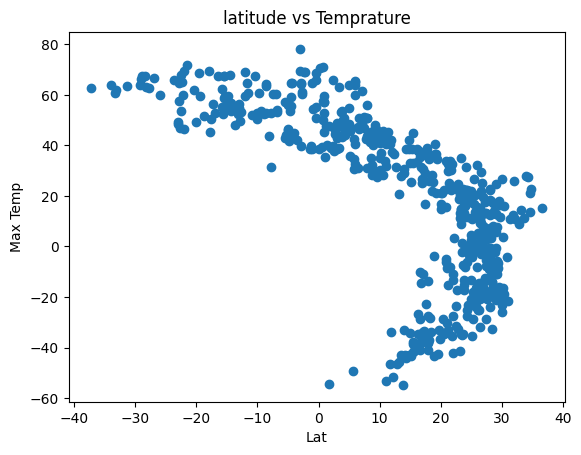

In [12]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Max Temp"], city_data_df["Lat"])

# Incorporate the other graph properties
plt.xlabel("Lat")
plt.ylabel("Max Temp")
plt.title("latitude vs Temprature")

# Save the figure
#plt.savefig("output_data/Fig1.png")

# Show plot
#plt.show()

#### Latitude Vs. Humidity

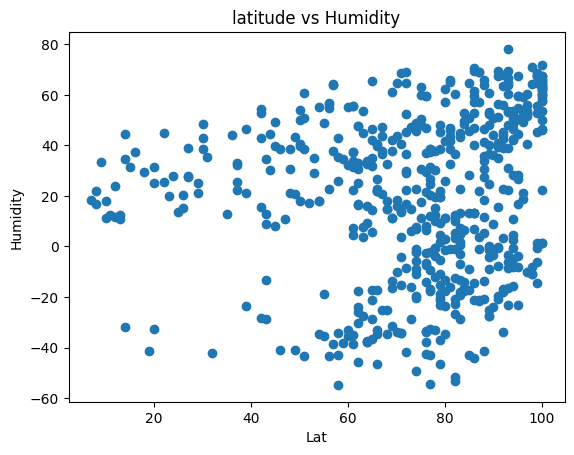

In [13]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Humidity"], city_data_df["Lat"])

# Incorporate the other graph properties
plt.xlabel("Lat")
plt.ylabel("Humidity")
plt.title("latitude vs Humidity")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

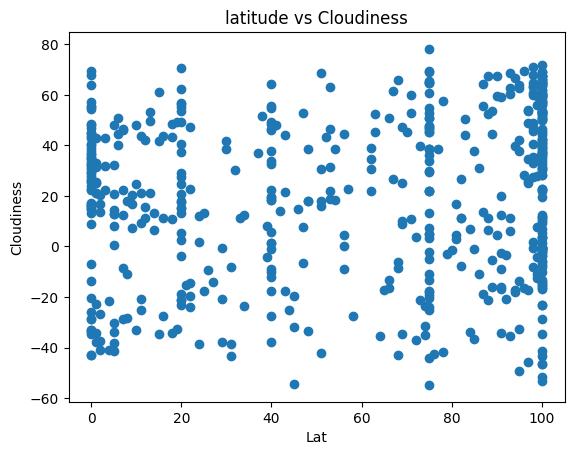

In [14]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Cloudiness"], city_data_df["Lat"])

# Incorporate the other graph properties
plt.xlabel("Lat")
plt.ylabel("Cloudiness")
plt.title("latitude vs Cloudiness")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

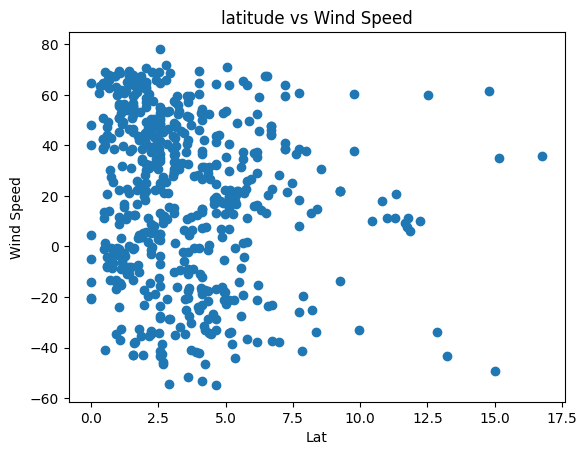

In [15]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Wind Speed"], city_data_df["Lat"])

# Incorporate the other graph properties
plt.xlabel("Lat")
plt.ylabel("Wind Speed")
plt.title("latitude vs Wind Speed")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [24]:
pip install scikit-learn

   ---------------------------------------- 0.0/10.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.6 MB 1.4 MB/s eta 0:00:08
    --------------------------------------- 0.2/10.6 MB 2.1 MB/s eta 0:00:05
   -- ------------------------------------- 0.7/10.6 MB 5.9 MB/s eta 0:00:02
   ------- -------------------------------- 1.9/10.6 MB 10.8 MB/s eta 0:00:01
   ------- -------------------------------- 1.9/10.6 MB 10.8 MB/s eta 0:00:01
   --------------- ------------------------ 4.1/10.6 MB 15.3 MB/s eta 0:00:01
   ------------------- -------------------- 5.2/10.6 MB 16.5 MB/s eta 0:00:01
   -------------------- ------------------- 5.4/10.6 MB 15.1 MB/s eta 0:00:01
   -------------------- ------------------- 5.4/10.6 MB 15.1 MB/s eta 0:00:01
   --------------------------- ------------ 7.3/10.6 MB 15.6 MB/s eta 0:00:01
   --------------------------------- ------ 8.8/10.6 MB 16.6 MB/s eta 0:00:01
   -------------------------------------- - 10.1/10.6 MB 17.5 MB/s eta 0:00

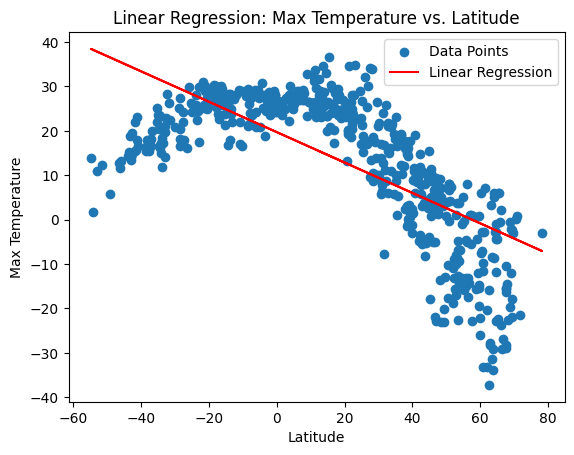

In [25]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named city_data_df with columns 'Lat' and 'Max Temp'

# Extracting the features (latitude) and target (max temperature) variables
X = city_data_df[['Lat']]
y = city_data_df['Max Temp']

# Creating a linear regression model
model = LinearRegression()

# Fitting the model with the data
model.fit(X, y)

# Making predictions based on the fitted model
predictions = model.predict(X)

# Plotting the data points
plt.scatter(X, y, label='Data Points')

# Plotting the regression line
plt.plot(X, predictions, color='red', label='Linear Regression')

# Adding labels and title
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.title('Linear Regression: Max Temperature vs. Latitude')

# Displaying the legend
plt.legend()

# Show the plot
plt.show()


In [19]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,basco,20.4487,121.9702,25.67,77,2,5.40,PH,1709675207
2,lagawe,16.8000,121.1192,20.11,95,9,1.22,PH,1709675207
3,jilib,0.4883,42.7854,26.75,83,5,4.37,SO,1709675207
4,makoua,0.0069,15.6333,24.24,89,56,1.42,CG,1709675207
5,ola,59.5833,151.2833,-14.80,76,100,3.68,RU,1709675208


In [20]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,port-aux-francais,-49.3500,70.2167,5.67,74,95,15.01,TF,1709675207
6,vila velha,-20.3297,-40.2925,28.97,74,0,3.60,BR,1709675022
8,quellon,-43.1167,-73.6167,13.54,85,68,1.94,CL,1709675208
10,puerto ayora,-0.7393,-90.3518,28.98,91,29,5.36,EC,1709675208
13,rawson,-43.3002,-65.1023,18.95,51,100,13.22,AR,1709675209


###  Temperature vs. Latitude Linear Regression Plot

In [ ]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named city_data_df with columns 'Lat' and 'Max Temp'

# Extracting the features (latitude) and target (max temperature) variables
X = city_data_df[['Lat']]
y = city_data_df['Max Temp']

# Creating a linear regression model
model = LinearRegression()

# Fitting the model with the data
model.fit(X, y)

# Making predictions based on the fitted model
predictions = model.predict(X)

# Plotting the data points
plt.scatter(X, y, label='Data Points')

# Plotting the regression line
plt.plot(X, predictions, color='red', label='Linear Regression')

# Adding labels and title
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.title('Linear Regression: Max Temperature vs. Latitude')

# Displaying the legend
plt.legend()

# Show the plot
plt.show()


In [33]:
linear_regress

NameError: name 'linear_regress' is not defined

In [34]:
# Linear regression on Northern Hemisphere
linear_regress(northern_hemi_df["Lat"].rename("Latitude"), northern_hemi_df["Max Temp"], (10, -30))

NameError: name 'linear_regress' is not defined

The r-value is: 0.4121057168607245


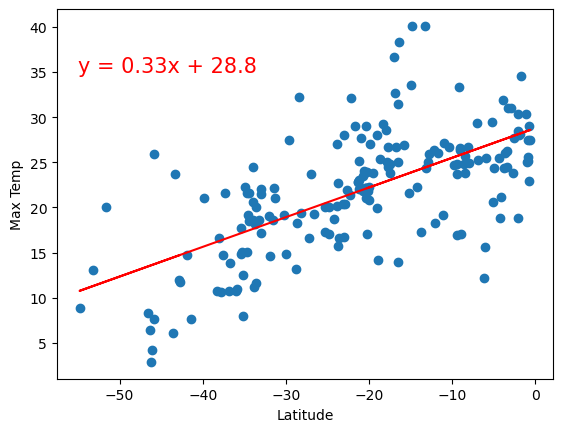

In [ ]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.05689741545789598


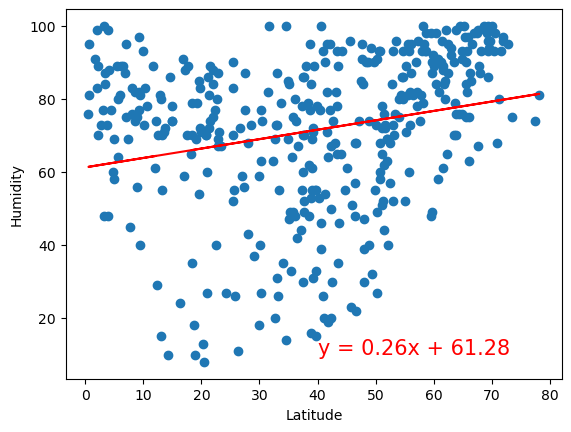

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.0002808747046324607


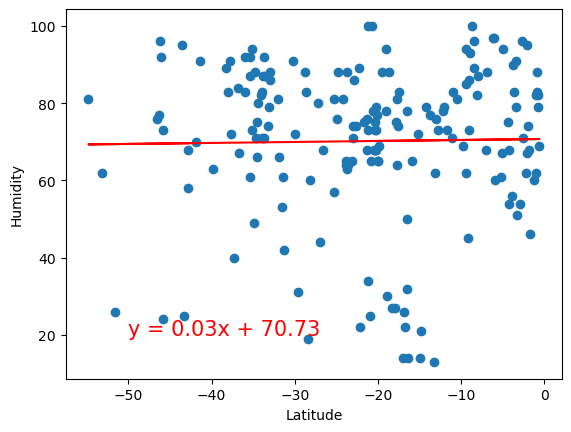

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.024026517125811015


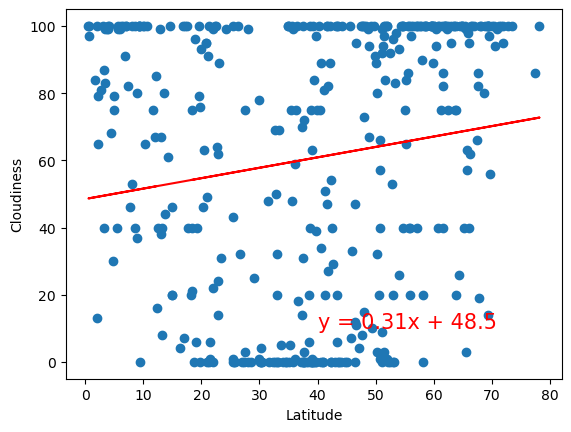

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.02056735429994368


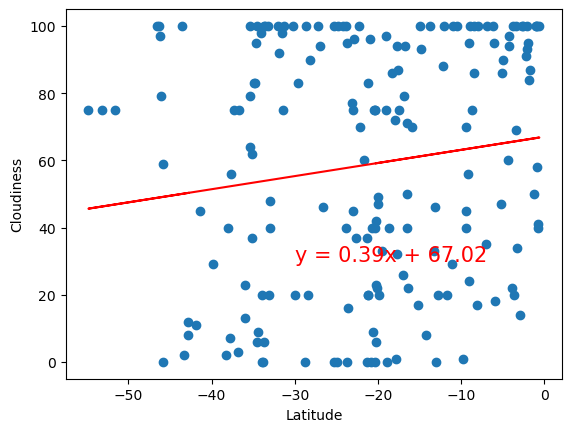

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.030396762354449467


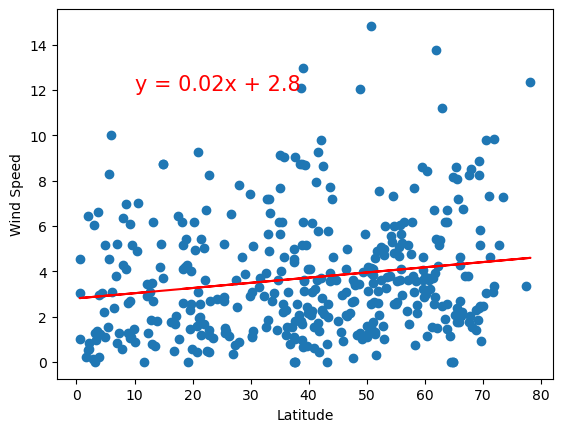

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.062239040700515696


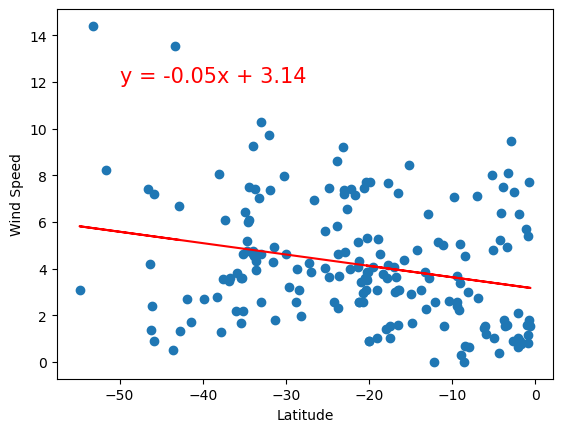

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE